In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)



In [3]:
# Sort the data
city_df.sort_values(by="city", inplace=True)
ride_df.sort_values(by="city", inplace=True)

# Reindex for clarity/organization
city_df=city_df.reset_index(drop=True)
ride_df=ride_df.reset_index(drop=True)

# merge the two dataframes
city_ride_df = pd.merge(ride_df,city_df,on="city",how="left")

# Display merged dataframe
city_ride_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007,12,Urban
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176,12,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
# city_ride_df["total_rides_city"] =

# ESTABLISHING THE CALCULATIONS IN ONE DATAFRAME (CITY_RIDE_DF)
# Total rides per city (x-axis)
city_rides = city_ride_df["city"].value_counts()
city_rides = city_rides.to_frame(name="city_rides")
city_rides.reset_index(inplace=True)
city_rides.rename(columns = {"index":"city"},inplace=True)
city_ride_df = pd.merge(city_ride_df,city_rides,on="city",how="left")
# average fare (y-axis)
avg_fare = city_ride_df.groupby(["city"])["fare"].mean()
avg_fare = avg_fare.to_frame(name="avg_fare")
avg_fare.reset_index(inplace=True)
avg_fare.rename(columns = {"index":"city"},inplace=True)
city_ride_df = pd.merge(city_ride_df,avg_fare,on="city",how="left")
city_ride_df.describe()

,fare,ride_id,driver_count,city_rides,avg_fare
count,2375.000000,2.375000e+03,2375.000000,2375.000000,2375.000000
mean,26.753112,4.887270e+12,28.930105,22.901474,26.753112
std,12.109465,2.907361e+12,20.666306,6.966249,4.178089
min,4.050000,3.218337e+08,1.000000,3.000000,20.093158
25%,17.190000,2.381175e+12,11.000000,18.000000,23.694333
50%,26.600000,4.748541e+12,23.000000,23.000000,25.855000
75%,36.645000,7.461936e+12,45.000000,28.000000,29.547619
max,58.550000,9.991538e+12,73.000000,39.000000,43.278333


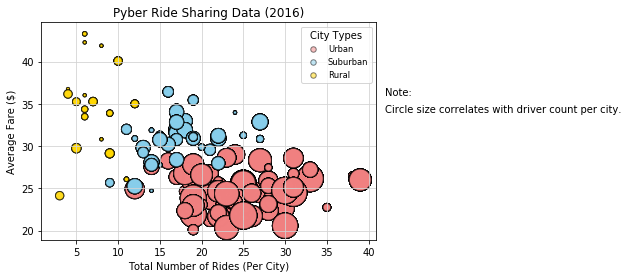

In [39]:
# BREAKING UP CITY_RIDE_DF INTO THREE SMALLER DATAFRAMES
cities_grouped_by_type = city_ride_df.groupby(["type"])
# urban dataframe
urban_cities=cities_grouped_by_type.get_group("Urban")
# suburban dataframe
suburban_cities = cities_grouped_by_type.get_group("Suburban")
# rural dataframe
rural_cities = cities_grouped_by_type.get_group("Rural")


# BUILD SCATTER PLOTS
# creating scatter plots for each type of city
plt.scatter(urban_cities["city_rides"],urban_cities["avg_fare"],urban_cities["driver_count"]*10,edgecolors="black",facecolors="lightcoral",alpha=0.5,label="Urban")
plt.scatter(suburban_cities["city_rides"],suburban_cities["avg_fare"],suburban_cities["driver_count"]*10,edgecolors="black",facecolors="skyblue",alpha=0.5,label="Suburban")
plt.scatter(rural_cities["city_rides"],rural_cities["avg_fare"],rural_cities["driver_count"]*10,edgecolors="black",facecolors="gold",alpha=0.5,label="Rural")
# graph formatting
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# creating a legend
lgnd=plt.legend(title="City Types",loc="upper right",fontsize="small",scatterpoints=1,markerscale=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# incorporating a text label regarding circle size
plt.text(42,36,"Note:")
plt.text(42,34,"Circle size correlates with driver count per city.")
# save Figure
plt.savefig("output/01_ride_sharing_data_bubble_plot.png")
plt.show()

In [ ]:
#placeholder

In [ ]:
#placeholder

In [ ]:
#placeholder

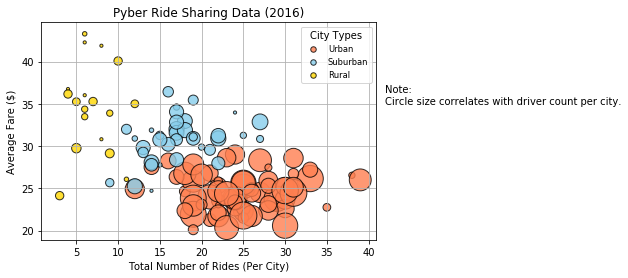

In [3]:
# Show plot

## Total Fares by City Type

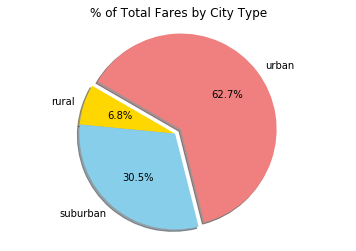

In [38]:
# CALCULATIONS
# calculate total fares
total_fares = city_ride_df.groupby(["type"])["fare"].sum()
# calculate sum of all total fares and turn total fares into percentages
total_fares_total = total_fares.sum()
total_fares = total_fares / total_fares_total

# CREATE PIE CHART
# initial pie chart formula
plt.pie(total_fares, shadow = True, startangle = 150, labels = ["rural","suburban","urban"],explode=[0,0,0.075],colors=["gold","skyblue","lightcoral"],autopct="%1.1f%%")
# chart formatting
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("output/02_%_total_fares_by_city_type.png")
plt.show()

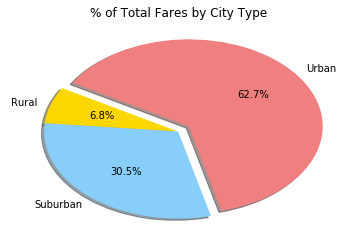

In [4]:
# placeholder

## Total Rides by City Type

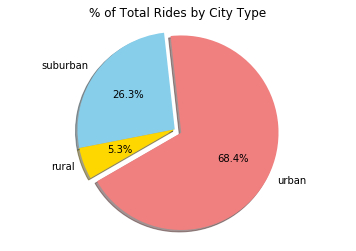

In [47]:
# CALCULATIONS
# calculate total rides
total_rides_type = city_ride_df.group_by["type"].value_counts("")
# calculate sum of all total rides and turn total rides into percentages
total_rides_type = total_rides_type / total_rides_type.sum()

# CREATE PIE CHART
# initial pie chart formula
plt.pie(total_rides_type,shadow = True,startangle = 210, labels = ["urban","suburban","rural"],explode=[0.075,0,0],colors=["lightcoral","skyblue","gold"],autopct="%1.1f%%")
# chart formatting
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# save figure
plt.savefig("output/03_%_total_rides_by_city_type.png")
plt.show()

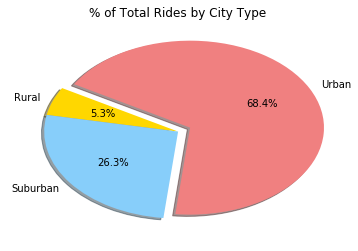

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

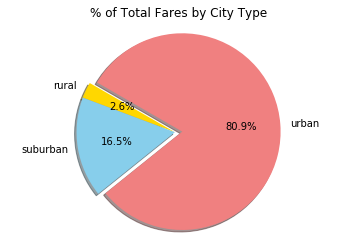

In [55]:
# CALCULATIONS
# drop duplicate cities
city_ride_df_two = city_ride_df.drop_duplicates(["city"])
# calculate total drivers
total_drivers_type = city_ride_df_two.groupby(["type"])["driver_count"].sum()
# calculate sum of all total drivers and turn total rides into percentages
total_drivers_type = total_drivers_type / total_drivers_type.sum()

# CREATE PIE CHART
plt.pie(total_drivers_type, shadow = True, startangle = 150, labels = ["rural","suburban","urban"],explode=[0,0,0.075],colors=["gold","skyblue","lightcoral"],autopct="%1.1f%%")
# chart formatting
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("output/04_%_total_drivers_by_city_type.png")
plt.show()


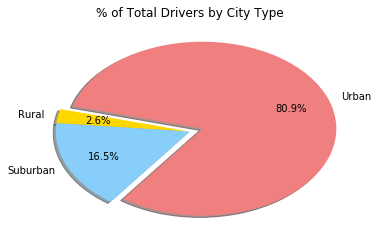